In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy  as np
import seaborn as sns

df=pd.read_csv ("D:\\NTI Tanta Data Analysis\\lec6\\Assignment\\Task 1\\archive\\UdemyCoursesDataset.csv")

df.tail()


,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,4 hours,2015-04-20T22:15:17Z,Web Development
3678,552700,Your Second Course on Piano: Two Handed Playing,True,70,1018,12,22,Beginner Level,5 hours,2015-10-26T20:04:21Z,Musical Instruments
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40,723,130,37,All Levels,6.5 hours,2015-11-11T18:55:45Z,Web Development
3680,1225194,Zoho Books Gestion Financière d'Entreprise pas...,False,Free,229,0,33,All Levels,2 hours,2017-05-26T16:45:55Z,Business Finance
3681,964478,Zombie Apocalypse Photoshop Actions,True,50,12,1,15,All Levels,1.5 hours,2016-09-26T22:19:48Z,Graphic Design


In [201]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3682 non-null   int64 
 1   course_title         3682 non-null   object
 2   is_paid              3682 non-null   bool  
 3   price                3682 non-null   object
 4   num_subscribers      3682 non-null   int64 
 5   num_reviews          3682 non-null   int64 
 6   num_lectures         3682 non-null   int64 
 7   level                3682 non-null   object
 8   content_duration     3682 non-null   object
 9   published_timestamp  3682 non-null   object
 10  subject              3682 non-null   object
dtypes: bool(1), int64(4), object(6)
memory usage: 291.4+ KB


In [202]:
df.describe()

,course_id,num_subscribers,num_reviews,num_lectures
count,3.682000e+03,3682.000000,3682.000000,3682.000000
mean,6.766121e+05,3194.230310,156.093156,40.065182
std,3.436355e+05,9499.378361,934.957204,50.373299
min,8.324000e+03,0.000000,0.000000,0.000000
25%,4.078430e+05,110.250000,4.000000,15.000000
50%,6.885580e+05,911.500000,18.000000,25.000000
75%,9.617515e+05,2540.250000,67.000000,45.000000
max,1.282064e+06,268923.000000,27445.000000,779.000000


Data Cleaning


In [203]:
#cleaning
df.isnull().sum()

course_id              0
course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [204]:
df.dropna(inplace=True) 

In [205]:
df.duplicated().sum()


6

In [206]:
df.drop_duplicates(inplace=True)


In [207]:
#delete rows that has 0  lectures
for i in df.index:
    if(df.loc[i,'num_lectures']==0):  
        df.drop(i,inplace=True)      
        
(df['num_lectures']==0).sum()# check on number of lec >0

#chang price to numeric , replace non numeric with mean and rounded the number
df["price"]=pd.to_numeric(df["price"],errors='coerce')

df["price"].fillna(df["price"].mean(),inplace=True)
df["price"]=df["price"].round()




In [208]:
#dorp course id col becauase i don't use it
df.drop(columns=['course_id'],inplace=True)
df.shape


(3671, 10)

In [209]:

df["published_timestamp"]=pd.to_datetime(df["published_timestamp"])
df["year"]=df["published_timestamp"].dt.year
df["month"]=df["published_timestamp"].dt.month
df

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,month
0,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35.0,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments,2014,9
1,#10 Hand Coordination - Transfer Chord Ballad ...,True,75.0,1593,1,41,Intermediate Level,1 hour,2017-04-12 19:06:34+00:00,Musical Instruments,2017,4
2,#12 Hand Coordination: Let your Hands dance wi...,True,75.0,482,1,47,Intermediate Level,1.5 hours,2017-04-26 18:34:57+00:00,Musical Instruments,2017,4
3,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75.0,850,3,43,Intermediate Level,1 hour,2017-02-21 23:48:18+00:00,Musical Instruments,2017,2
4,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75.0,940,3,32,Intermediate Level,37 mins,2017-02-21 23:44:49+00:00,Musical Instruments,2017,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3677,Your Own Site in 45 Min: The Complete Wordpres...,True,120.0,1566,29,36,All Levels,4 hours,2015-04-20 22:15:17+00:00,Web Development,2015,4
3678,Your Second Course on Piano: Two Handed Playing,True,70.0,1018,12,22,Beginner Level,5 hours,2015-10-26 20:04:21+00:00,Musical Instruments,2015,10
3679,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40.0,723,130,37,All Levels,6.5 hours,2015-11-11 18:55:45+00:00,Web Development,2015,11
3680,Zoho Books Gestion Financière d'Entreprise pas...,False,72.0,229,0,33,All Levels,2 hours,2017-05-26 16:45:55+00:00,Business Finance,2017,5


EDA and visulaziation   


1-correlation between columns with Heatmap

<Axes: >

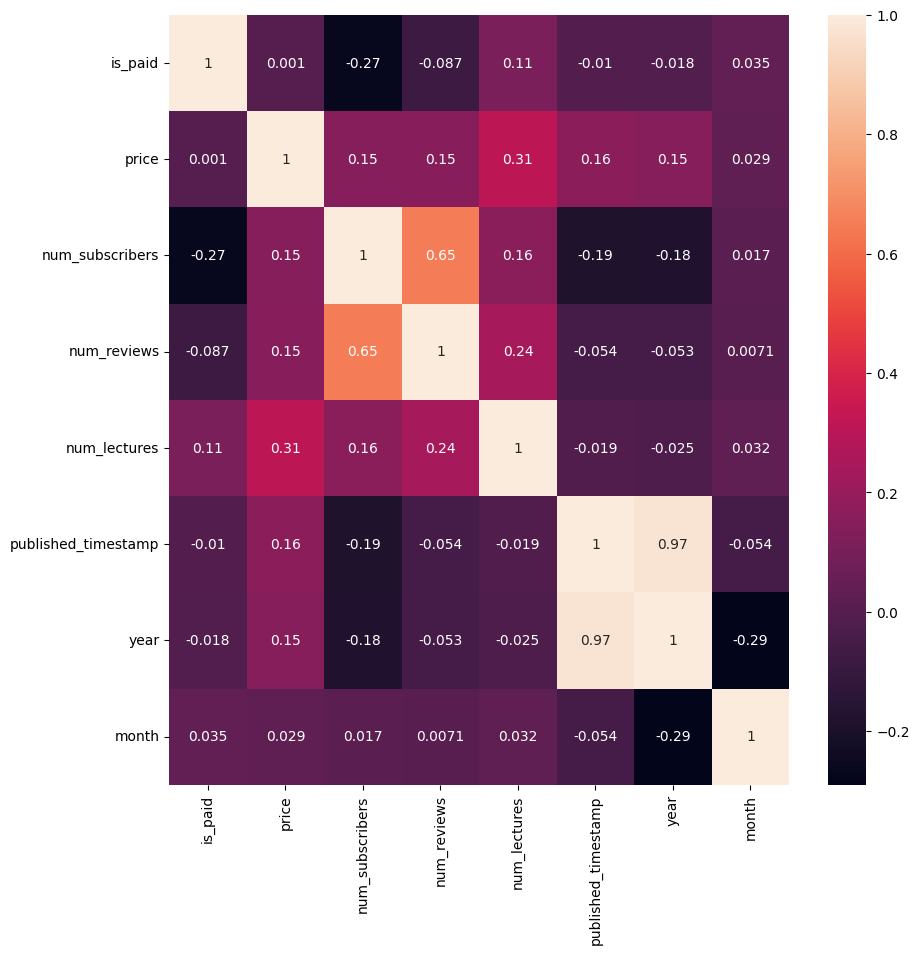

In [210]:
#heat map 
#first exclude numbers
num_df=df.select_dtypes(exclude=np.object_)
plt.figure(figsize=(10,10))
sns.heatmap(num_df.corr(),annot=True)

2-Paid and free courses'

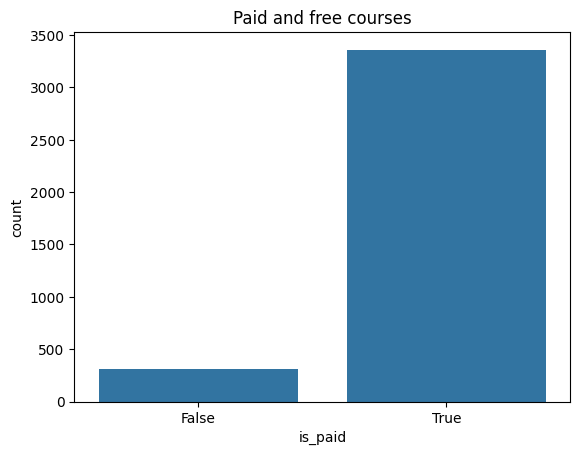

In [ ]:
sns.countplot(x='is_paid',data=df)
plt.title('Paid and free courses')
plt.show()

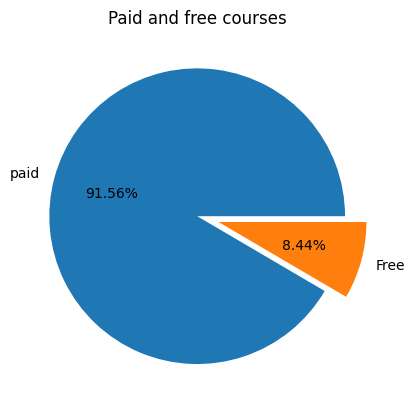

In [219]:
plt.pie(df["is_paid"].value_counts(),labels=('paid','Free'),autopct='%1.2f%%',explode=[0,0.15])
plt.title('Paid and free courses')
plt.show()

3-Relation between paid courses and number of subscribers

<Axes: title={'center': 'Average(Free/Paid)'}, xlabel='is_paid', ylabel='num_subscribers'>

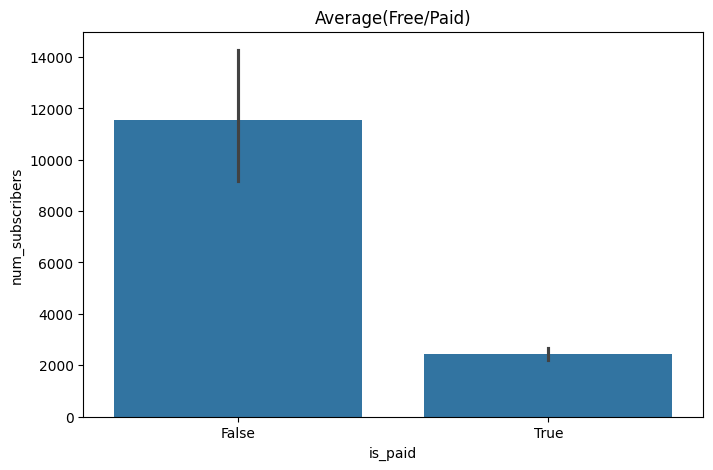

In [220]:
plt.figure(figsize=(8,5))
plt.title('Average(Free/Paid)')
sns.barplot(x="is_paid",y="num_subscribers",data=df)

4-Number of courses in each subject

<Axes: xlabel='subject', ylabel='count'>

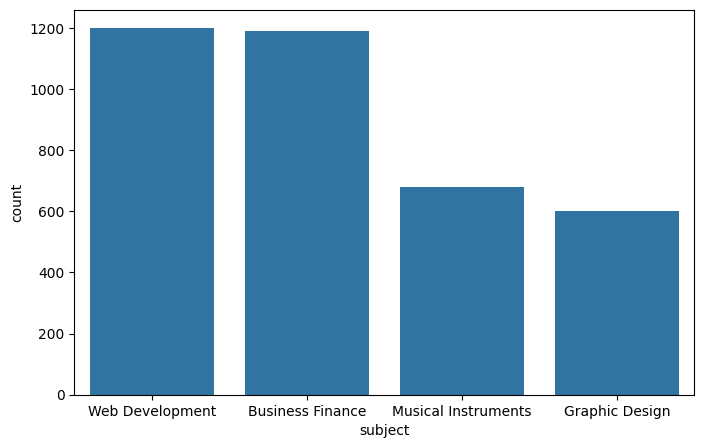

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='subject',order=df.subject.value_counts().index)
plt.title('Number of courses in each subject')

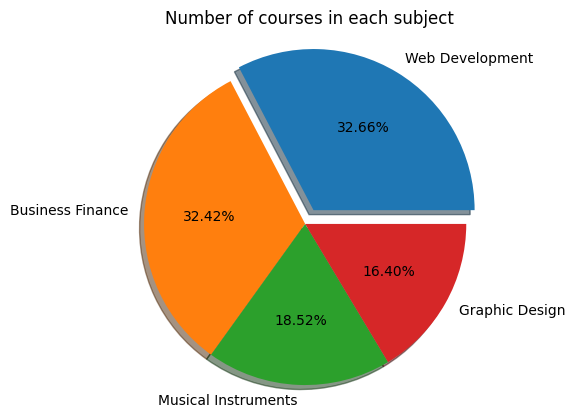

In [224]:
plt.pie(df['subject'].value_counts(),labels=df['subject'].value_counts().index,autopct='%1.2f%%',shadow=True,explode=[0.1,0,0,0])
plt.title('Number of courses in each subject')
plt.axis('equal')
plt.show()

5-Which subject hss the max number of subscribers?

<Axes: title={'center': 'Avg demand by course subject'}, xlabel='subject', ylabel='num_subscribers'>

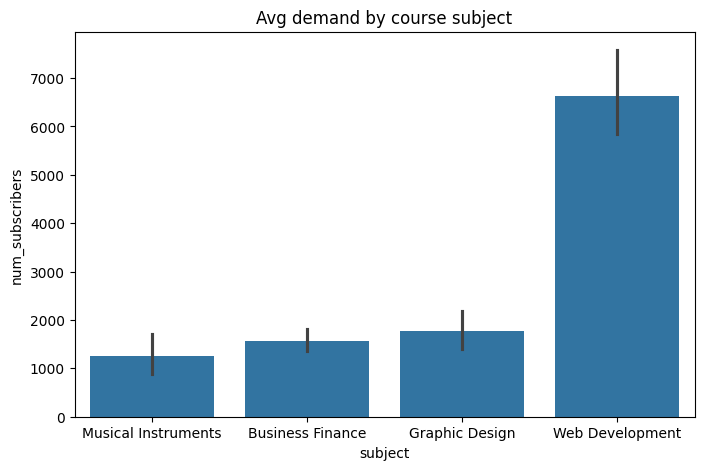

In [225]:
plt.figure(figsize=(8,5))
plt.title('Avg demand by course subject')
sns.barplot(x='subject',y='num_subscribers',data =df)

<Axes: title={'center': 'Avg demand by course subject'}, xlabel='subject', ylabel='num_subscribers'>

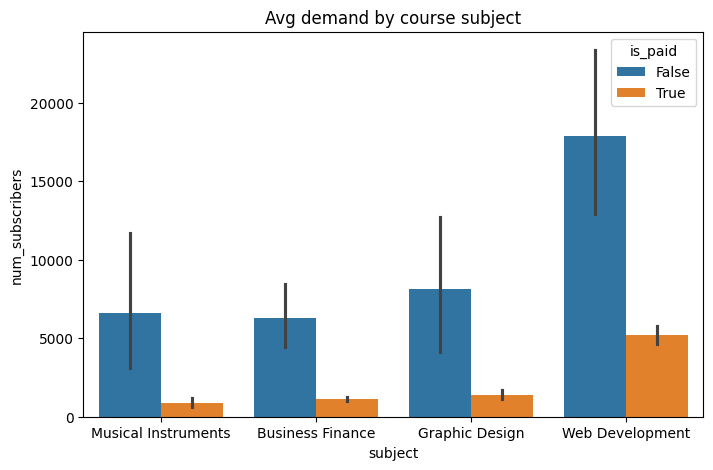

In [226]:
plt.figure(figsize=(8,5))
plt.title('Avg demand by course subject')
sns.barplot(x='subject',y='num_subscribers',data =df,hue='is_paid')

6-Number of courses in each level

<Axes: xlabel='level', ylabel='count'>

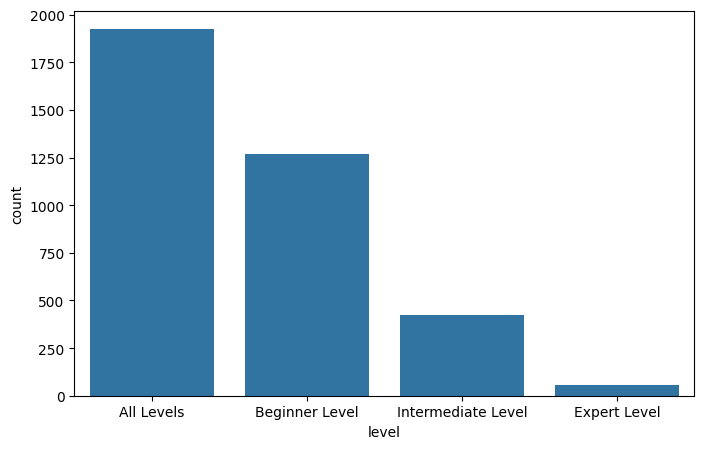

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='level',order=df.level.value_counts().index)
plt.title('Number of courses in each level')

Text(0.5, 1.0, 'precentage on each title')

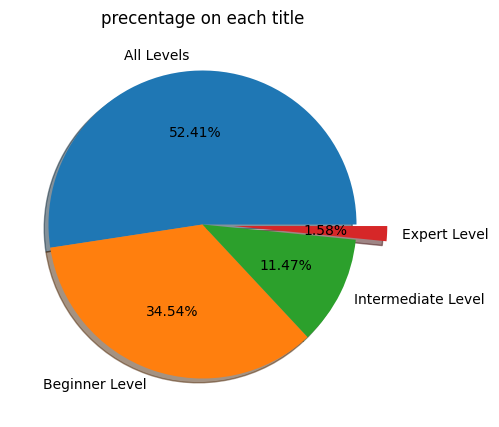

In [231]:
plt.figure(figsize=(8,5))
plt.pie(df.level.value_counts(),labels=df['level'].value_counts().index,autopct='%1.2f%%',shadow=True,explode=[0,0,0,0.2])
plt.title("precentage on each title")

7-Disribution of course price

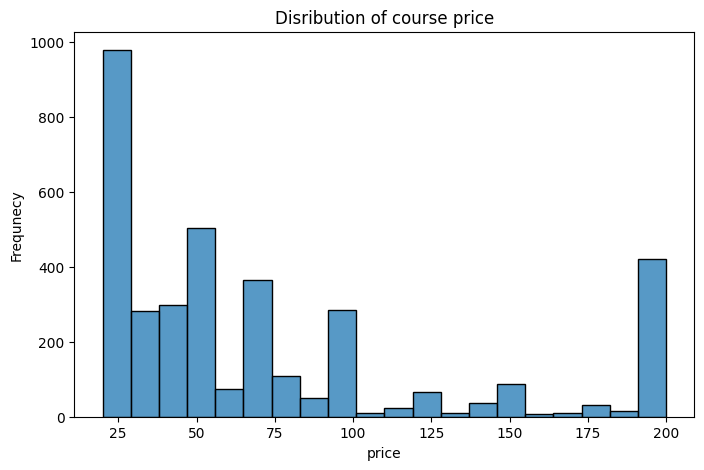

In [232]:
plt.figure(figsize=(8,5))
sns.histplot(data=df,x='price',bins=20)
plt.title('Disribution of course price')
plt.xlabel('price')
plt.ylabel("Frequnecy")
plt.show()

8-Relation between price and number of subscribers

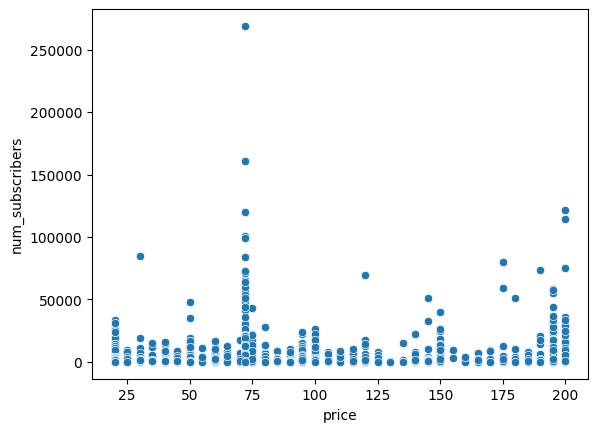

In [235]:
sns.scatterplot(x='price',y='num_subscribers',data=df)
plt.show()

9-Which course duration and number of lectures does subscribers prefer?

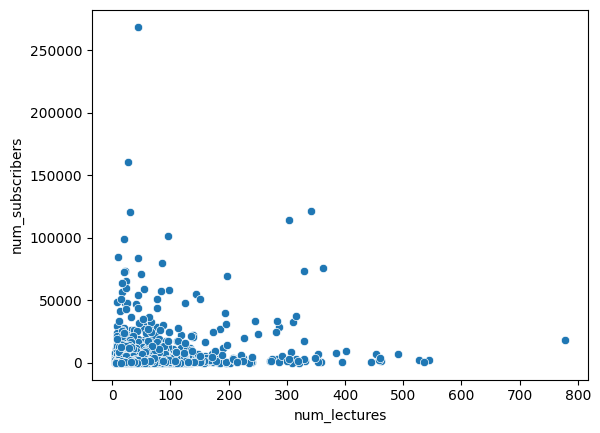

In [236]:
sns.scatterplot(x='num_lectures',y='num_subscribers',data=df)
plt.show()

In [ ]:
sns.scatterplot(x='num_lectures',y='num_subscribers',data=df)
plt.show()

10-Tolal price of courses over years

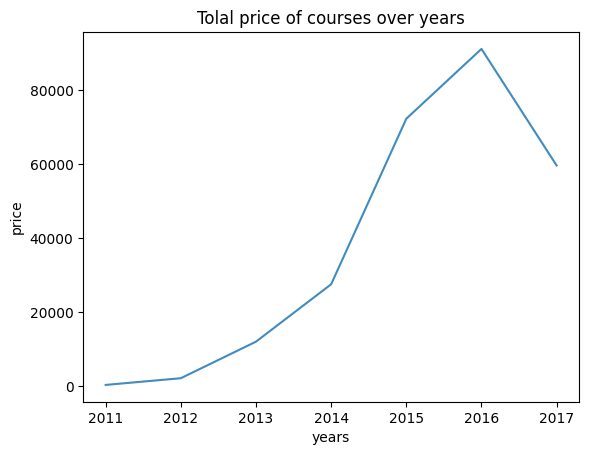

In [238]:
plt.plot(df.groupby('year')['price'].sum(),ls='-',alpha=0.85)
plt.title('Tolal price of courses over years')
plt.xlabel('years')
plt.ylabel('price')
plt.show()

11-Distribution of Courses Published Over Months

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='month')
plt.title('Distribution of Courses Published Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Courses')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

12-What is the most 5 courses that have high subscribers?

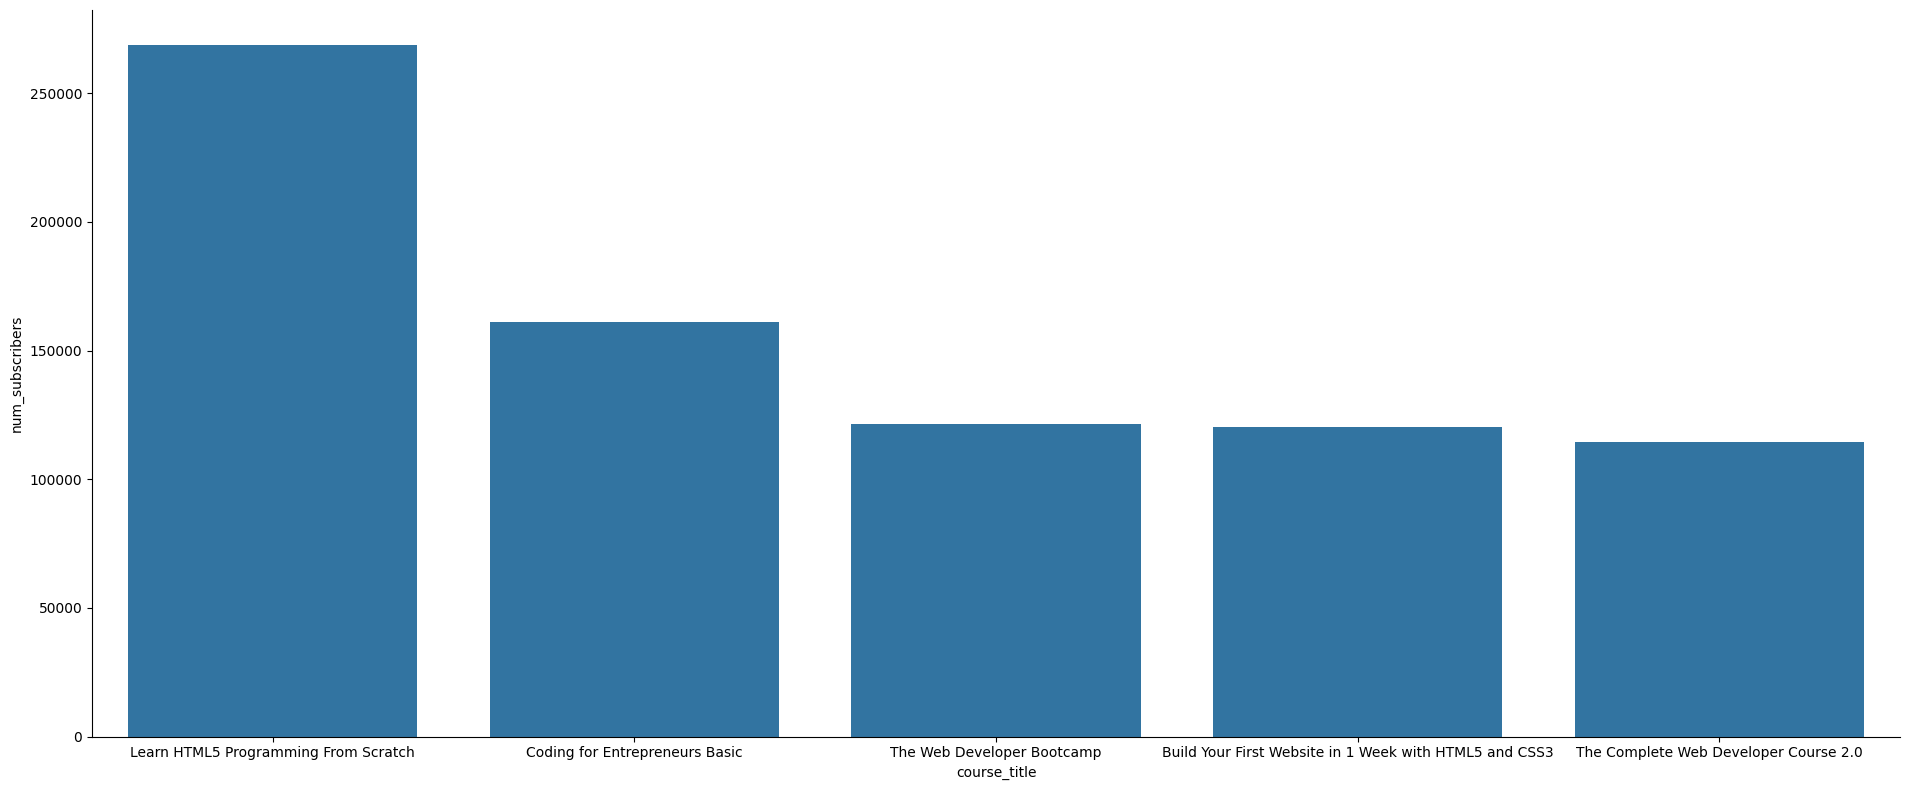

In [239]:
z=df.loc[df.num_subscribers.sort_values(ascending=False).head().index]
sns.catplot(data=z, kind ='bar', height = 8, aspect =2.4, x = 'course_title', y = 'num_subscribers')


13-Most 5 courses that have high reviews

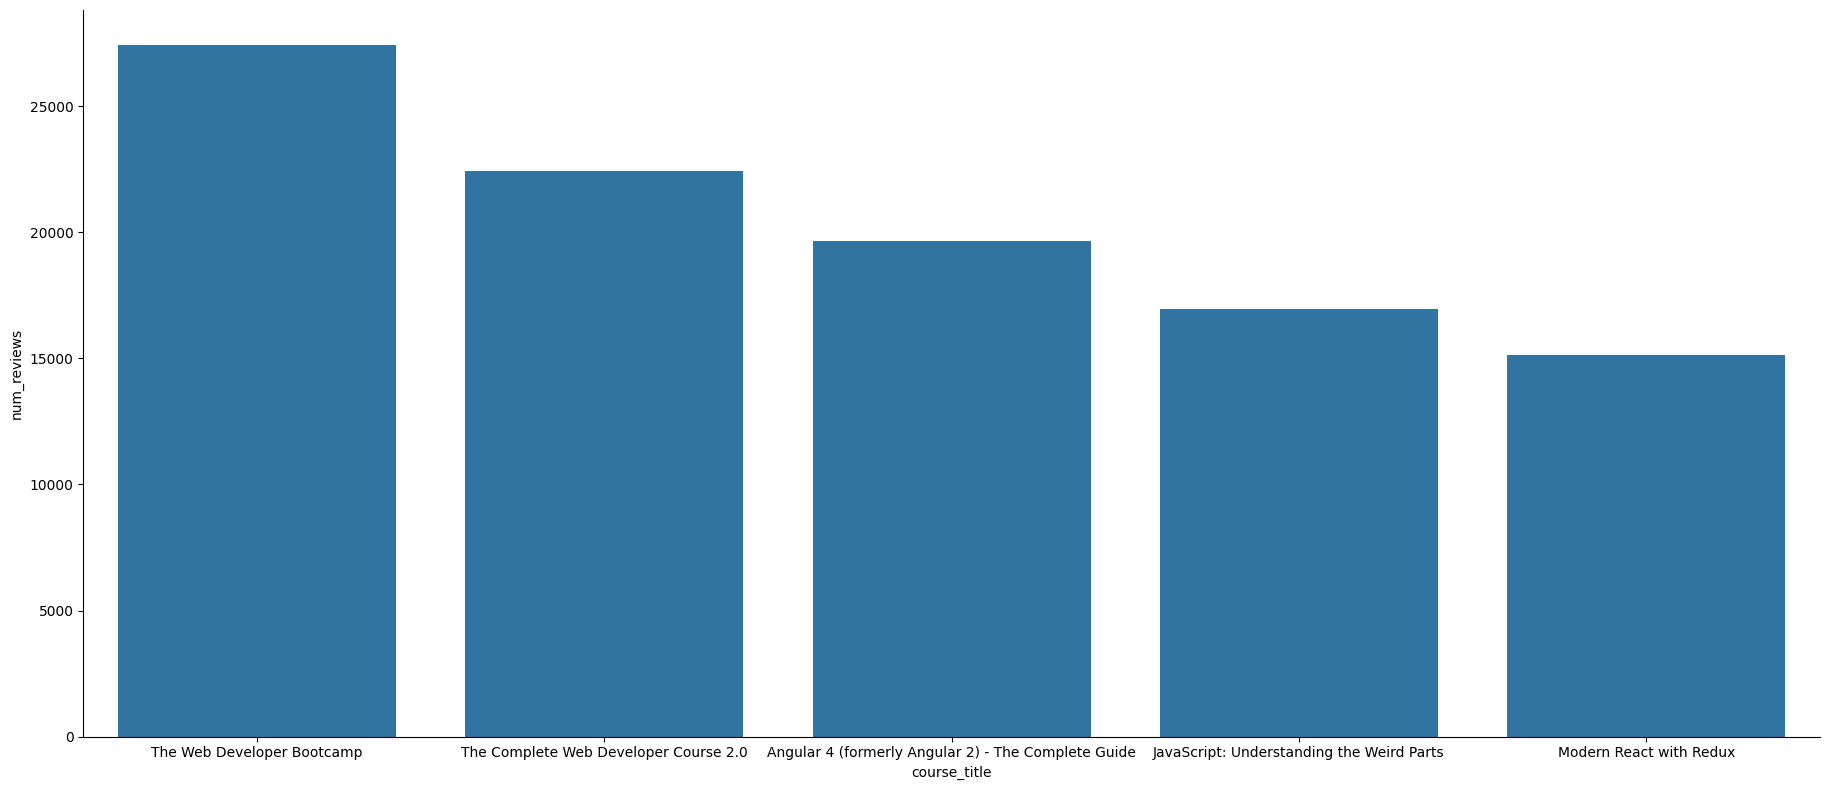

In [242]:
z=df.loc[df.num_reviews.sort_values(ascending=False).head().index]

sns.catplot(data=z, kind ='bar', height =8, aspect =2.3, x = 'course_title', y= 'num_reviews')

14-Top 20 courses that have high price

<Axes: xlabel='price', ylabel='count'>

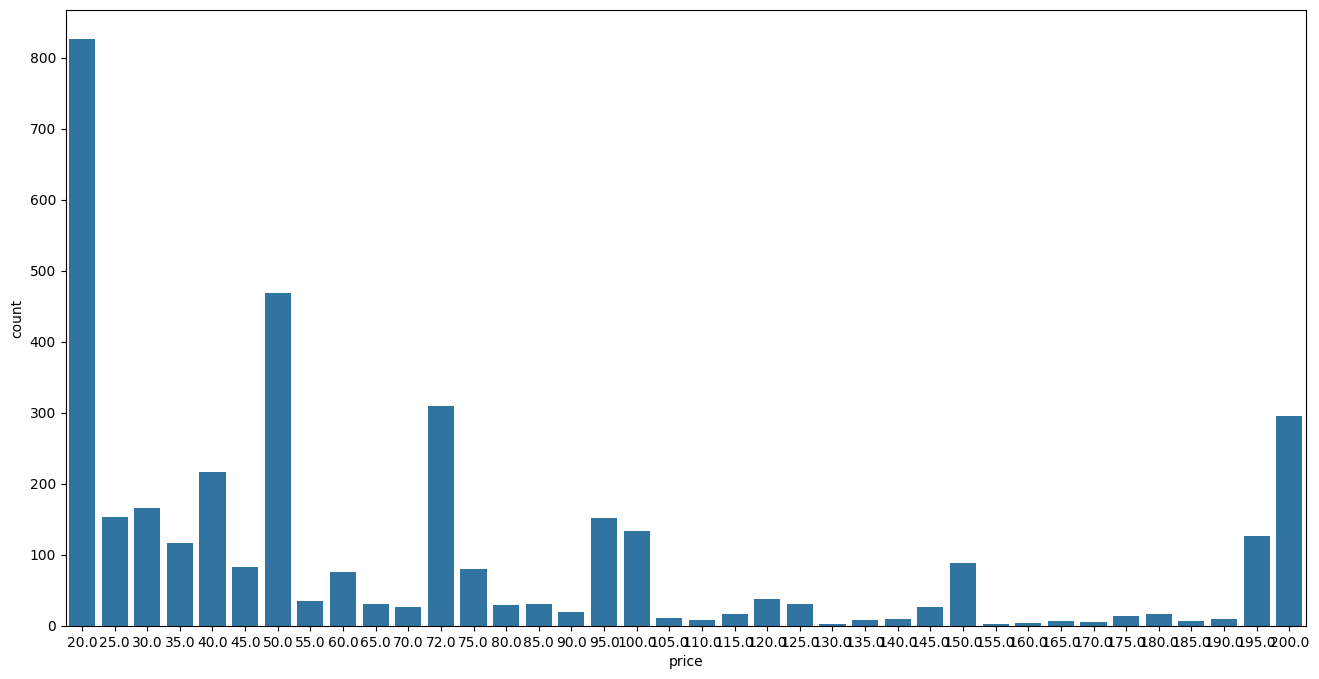

In [243]:
plt.figure(figsize=(16,8))
sns.countplot(data= df, x = 'price')

In [ ]:
z=df.loc[df.price.sort_values(ascending = False).head(20).index]
sns.catplot(data=z, kind='bar', height =7, aspect= 2.2, y= 'course_title', x= 'price')

15-Top 10 courses that have high num_lectures

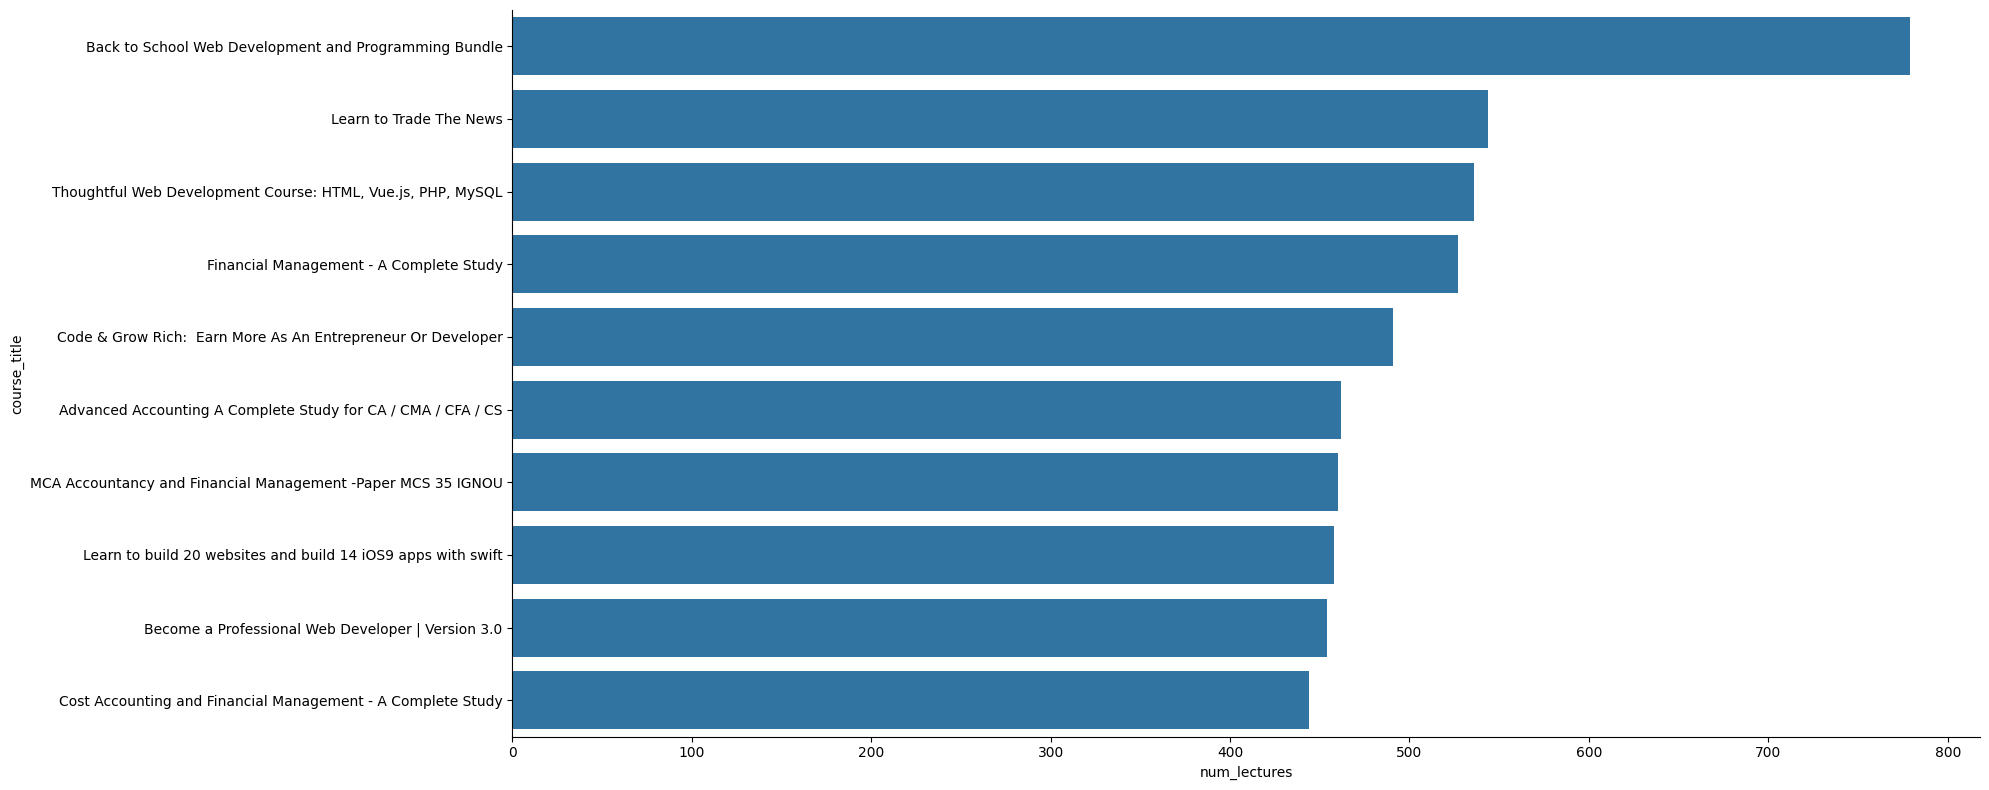

In [245]:
z= df.loc[df.num_lectures.sort_values (ascending =False).head(10).index]
sns.catplot(data=z, kind ='bar', height =8, aspect =2.5, y ='course_title', x ='num_lectures')